
[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /anaconda/envs/azureml_py310_sdkv2/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Base de dados 'sorvetes.csv' criada com sucesso:
   Temperatura  Vendas
0    22.490802     276
1    34.014286     385
2    29.639879     347
3    26.973170     289
4    18.120373     227


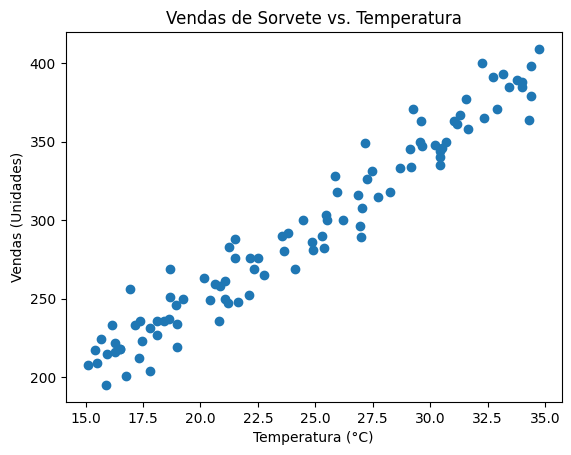

In [1]:
# --- CÉLULA 1: INSTALAÇÃO E GERAÇÃO DE DADOS ---

%pip install pandas numpy scikit-learn matplotlib mlflow azure-ai-ml joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) 
num_linhas = 100
temperaturas = np.random.uniform(15, 35, num_linhas)
fator = 10
base = 50
ruido = np.random.normal(0, 15, num_linhas)
vendas = (temperaturas * fator) + base + ruido
vendas[vendas < 0] = 0

df = pd.DataFrame({
    'Temperatura': temperaturas,
    'Vendas': vendas.astype(int)
})

df.to_csv('sorvetes.csv', index=False)

print("Base de dados 'sorvetes.csv' criada com sucesso:")
print(df.head())

plt.scatter(df['Temperatura'], df['Vendas'])
plt.title('Vendas de Sorvete vs. Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas (Unidades)')
plt.show()

In [2]:
# --- CÉLULA 2: TREINAR, REGISTRAR MÉTRICAS E SALVAR ---

import mlflow
import pandas as pd
import joblib # <--- Importante
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Carregar dados
df = pd.read_csv('sorvetes.csv')
X = df[['Temperatura']]
y = df['Vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Definir o Pipeline
pipeline = Pipeline(steps=[
    ('regressor', LinearRegression())
])
    
# 3. Iniciar execução do MLflow (APENAS PARA MÉTRICAS)
print("Iniciando o treinamento e registro de MÉTRICAS no MLflow...")
with mlflow.start_run(run_name="Experimento_Gelato_Local_Simples") as run:
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # --- LOG MANUAL DAS MÉTRICAS ---
    mlflow.log_metric("rmse_teste", rmse)
    mlflow.log_metric("r2_score_teste", r2)
    
    print(f"Treinamento Concluído (Run ID: {run.info.run_id})")
    print(f"  R2 Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")

# 4. SALVAR O MODELO LOCALMENTE
print("\nSalvando o modelo localmente como 'model.pkl'...")
joblib.dump(pipeline, "model.pkl")

print("\n--- Processo da Célula 2 concluído! ---")
print("VERIFIQUE:")
print("1. No menu 'Trabalhos' (Jobs), procure o 'Experimento_Gelato_Local_Simples'.")
print("2. No menu 'Arquivos' (Files), você verá um novo arquivo 'model.pkl'.")

Iniciando o treinamento e registro de MÉTRICAS no MLflow...
Treinamento Concluído (Run ID: 1b4b3d4e-d260-4ca1-b7a9-4dd60b01a27c)
  R2 Score: 0.9602
  RMSE: 12.1137
🏃 View run Experimento_Gelato_Local_Simples at: https://eastus.api.azureml.ms/mlflow/v2.0/subscriptions/7e91f069-16f7-4b40-bc1e-f0e2388af037/resourceGroups/rg-dio-projeto1/providers/Microsoft.MachineLearningServices/workspaces/workspacedio/#/experiments/9dd3919e-1099-4a89-9246-8c0ec194a487/runs/1b4b3d4e-d260-4ca1-b7a9-4dd60b01a27c
🧪 View experiment at: https://eastus.api.azureml.ms/mlflow/v2.0/subscriptions/7e91f069-16f7-4b40-bc1e-f0e2388af037/resourceGroups/rg-dio-projeto1/providers/Microsoft.MachineLearningServices/workspaces/workspacedio/#/experiments/9dd3919e-1099-4a89-9246-8c0ec194a487

Salvando o modelo localmente como 'model.pkl'...

--- Processo da Célula 2 concluído! ---
VERIFIQUE:
1. No menu 'Trabalhos' (Jobs), procure o 'Experimento_Gelato_Local_Simples'.
2. No menu 'Arquivos' (Files), você verá um novo arquivo 'm

In [4]:
# --- CÉLULA 3: TESTAR O MODELO ---

import joblib
import pandas as pd
import numpy as np

print("Carregando o modelo 'model.pkl' do arquivo...")
try:
    # 1. Carregar o modelo salvo
    modelo_carregado = joblib.load("model.pkl")

    # 2. Definir um dado de teste
    temp_teste = 30
    
    # Criar um DataFrame com o MESMO nome de coluna do treino
    dado_para_prever = pd.DataFrame([[temp_teste]], columns=["Temperatura"])
    # -------------------------------

    # 4. Fazer a previsão
    previsao = modelo_carregado.predict(dado_para_prever)
    
    print("\n--- ✅ PREVISÃO LOCAL BEM-SUCEDIDA ---")
    print(f"Temperatura de Teste: {temp_teste}°C")
    print(f"Previsão de Vendas: {previsao[0]:.0f} unidades")
    print("---------------------------------------")

except FileNotFoundError:
    print("ERRO: O arquivo 'model.pkl' não foi encontrado.")
    print("Por favor, execute a Célula 2 primeiro.")
except Exception as e:
    print(f"Ocorreu um erro ao testar o modelo: {e}")

Carregando o modelo 'model.pkl' do arquivo...

--- ✅ PREVISÃO LOCAL BEM-SUCEDIDA ---
Temperatura de Teste: 30°C
Previsão de Vendas: 347 unidades
---------------------------------------
